In [1]:
# Isolation Forest method is based on the idea that anomalies are easier to isolate than normal data points.

In [2]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')  
# suppress warnings

In [3]:
filepath="C:\\Users\\madhu\\OneDrive\\Desktop\\DMPA_CCEB_38_57_62\\cleaned_data_1.csv"
df=pd.read_csv(filepath)
df.head()

,id,line_item_quantity,unit_price,pack_price,line_item_value,line_item_insurance,sub_classification,dosage,weight
0,3,1000,0.03,6.20,6200.0,240.117626,Pediatric,10mg/ml,358
1,15,31920,0.07,3.99,127360.8,240.117626,Adult,150mg,1855
2,16,38000,0.05,3.20,121600.0,240.117626,Adult,30mg,7590
3,23,416,0.02,5.35,2225.6,240.117626,Pediatric,10mg/ml,504
4,44,135,0.36,32.40,4374.0,240.117626,Pediatric,200mg,328


In [4]:
check_cols=['unit_price',
    'line_item_quantity',
    'line_item_value',
    'weight',
    'line_item_insurance']
x_train=df[check_cols]
# selecting a subset of columns
x_train.head()

,unit_price,line_item_quantity,line_item_value,weight,line_item_insurance
0,0.03,1000,6200.0,358,240.117626
1,0.07,31920,127360.8,1855,240.117626
2,0.05,38000,121600.0,7590,240.117626
3,0.02,416,2225.6,504,240.117626
4,0.36,135,4374.0,328,240.117626


In [5]:
x_train=x_train.apply(pd.to_numeric,errors='coerce')
# errors='coerce' any non-numeric values are converted to NaN (missing values).
x_train=x_train.dropna()
clf=IsolationForest(n_jobs=100,random_state=42,contamination=0.05)
# 100 CPU cores for parallel processing;
clf.fit(x_train)
y_pred_train=clf.predict(x_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [6]:
pd.value_counts(y_pred_train)
# 1[inlier] ; -1[outlier]

 1    4271
-1     225
Name: count, dtype: int64

In [7]:
x_train.loc[y_pred_train==-1,:]
# outliers by the Isolation Forest model.

,unit_price,line_item_quantity,line_item_value,weight,line_item_insurance
112,0.20,61021,725539.69,6768.0,1160.860000
169,0.56,60784,1018132.00,11179.0,240.117626
198,1.68,5900,297360.00,493.0,475.780000
312,1.51,1320,238682.40,304.0,240.117626
427,0.34,12560,516216.00,3073.0,1011.780000
...,...,...,...,...,...
7646,0.25,24470,726269.60,6808.0,1018.230000
7708,0.16,138974,653177.80,14845.0,915.760000
7724,0.43,69963,906720.48,7819.0,1121.610000
7772,0.14,93700,773962.00,12220.0,957.390000


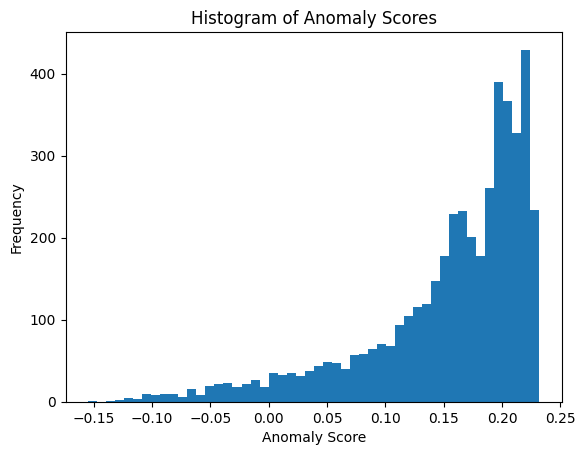

In [8]:
import matplotlib.pyplot as plt

plt.hist(clf.decision_function(x_train), bins=50)
plt.title("Histogram of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()

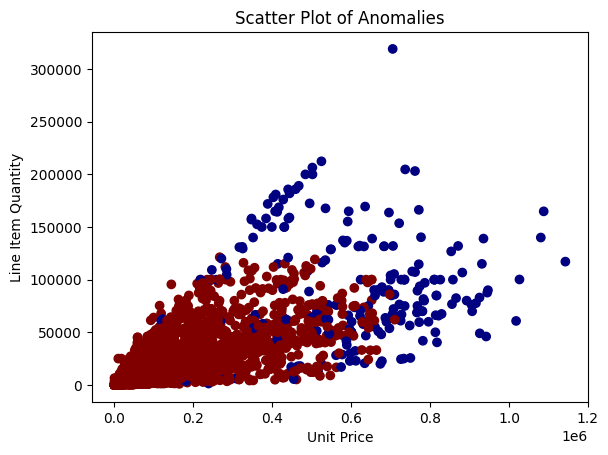

In [9]:
plt.scatter(x_train['line_item_value'], x_train['line_item_quantity'], c=y_pred_train, cmap='jet')
plt.title("Scatter Plot of Anomalies")
plt.xlabel("Unit Price")
plt.ylabel("Line Item Quantity")
plt.show()

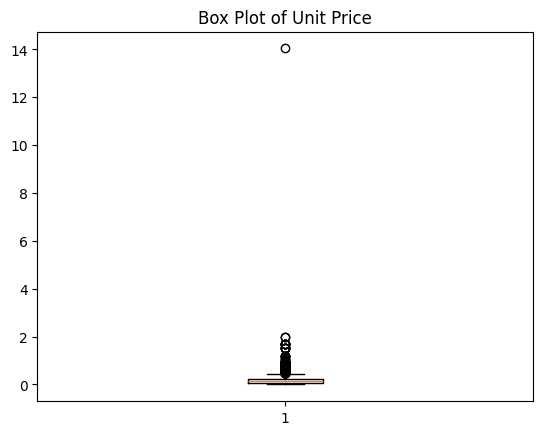

In [10]:
plt.boxplot(x_train['unit_price'])
plt.title("Box Plot of Unit Price")
plt.show()
# horizontal line -> median ; whiskers -> potential outliers

<Figure size 1500x1500 with 0 Axes>

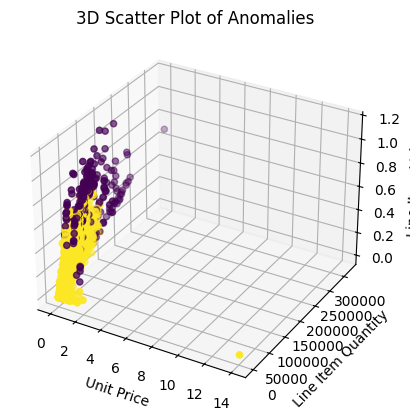

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15)) 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 111 only one subplot in the figure (1 row, 1 column, and this subplot is the first one).
ax.scatter(x_train['unit_price'], x_train['line_item_quantity'], x_train['line_item_value'], c=y_pred_train, cmap='viridis')
ax.set_xlabel('Unit Price')
ax.set_ylabel('Line Item Quantity')
ax.set_zlabel('Line Item Value')
plt.title("3D Scatter Plot of Anomalies")
plt.show()


In [12]:
cols=['line_item_quantity']
n_train=df[cols]
n_train.head()

,line_item_quantity
0,1000
1,31920
2,38000
3,416
4,135


In [13]:
n_train=n_train.apply(pd.to_numeric,errors='coerce')
n_train=n_train.dropna()
clf=IsolationForest(n_jobs=100,random_state=42,contamination=0.05)
clf.fit(n_train)
m_pred_train=clf.predict(n_train)
m_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [14]:
pd.value_counts(m_pred_train)

 1    7477
-1     388
Name: count, dtype: int64

In [15]:
n_train.loc[m_pred_train==-1,:]

,line_item_quantity
82,95500
85,71577
308,98400
386,83000
459,100000
...,...
7818,110000
7830,120000
7835,71600
7860,205243


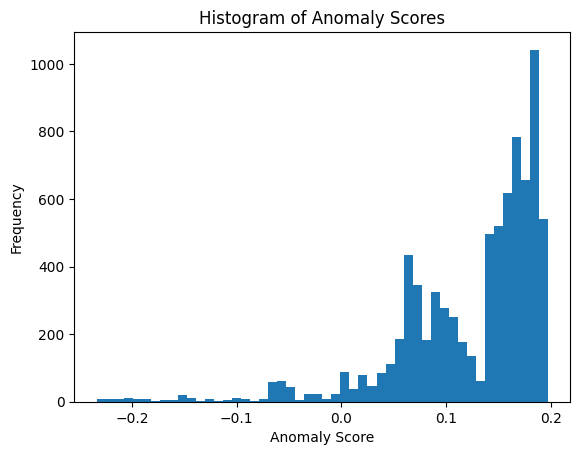

In [16]:
import matplotlib.pyplot as plt

plt.hist(clf.decision_function(n_train), bins=50)
plt.title("Histogram of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
# Evaluate the model
conf_matrix = confusion_matrix(np.ones(len(x_train)), y_pred_train)
classification_rep = classification_report(np.ones(len(x_train)), y_pred_train, target_names=['Normal', 'Anomaly'])

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[   0    0]
 [ 225 4271]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         0
     Anomaly       1.00      0.95      0.97      4496

    accuracy                           0.95      4496
   macro avg       0.50      0.47      0.49      4496
weighted avg       1.00      0.95      0.97      4496



In [18]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
# Evaluate precision, recall, and F1 score (if you have true labels for anomalies)
true_labels = np.where(y_pred_train == -1, 1, 0)  
predicted_labels = np.where(y_pred_train == -1, 1, 0)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Precision, Recall, F1 Score
precision = precision_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
recall = recall_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
f1 = f1_score(true_labels, predicted_labels, zero_division=1)  # Handle zero division
accuracy = accuracy_score(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[4271    0]
 [   0  225]]
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Accuracy: 1.00
